# 🧠 SVM Training for Mask Detection
This notebook trains a Support Vector Machine (SVM) model on flattened image data for classifying masked vs. unmasked faces.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Base directory containing the two folders
base_path = 'E:/publications/occlusion aware face recognition'  # adjust to your actual path
folders = {
    "final with mask": 1,        # Masked = 1
    "final without mask": 0      # Unmasked = 0
}

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

# Load images and labels
images = []
labels = []

for folder_name, label in folders.items():
    folder_path = os.path.join(base_path, folder_name)
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(valid_extensions):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (50, 50))
                images.append(img.flatten())
                labels.append(label)

# Convert to NumPy arrays
images_np = np.array(images)
labels_np = np.array(labels)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(images_np, labels_np, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train SVM
svm = SVC(kernel='rbf')
svm.fit(x_train_pca, y_train)

# Evaluate
y_pred = svm.predict(x_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9772864930345245
Precision: 0.9890975166565718
Recall: 0.9662721893491124
F1 Score: 0.9775516312481293
Confusion Matrix:
 [[1594   18]
 [  57 1633]]


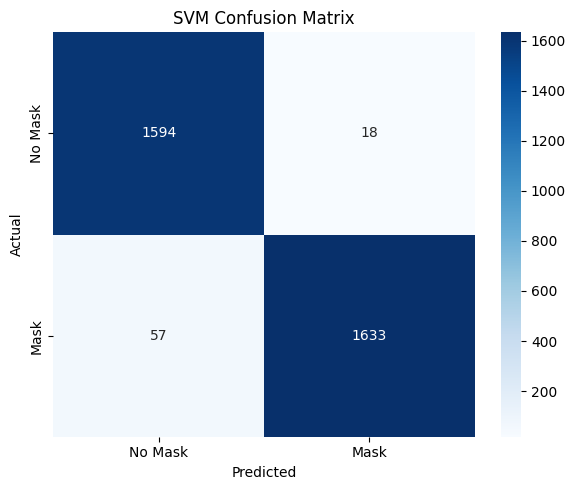

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.tight_layout()
plt.savefig("E:/edu/occlusion-aware-face-recognition/results/confusion_matrix_svm.png")
plt.show()